In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import interpolate
import pandas as pd
import dffuncs as dff

In [60]:
tmp=np.zeros_like(xx)
tmp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

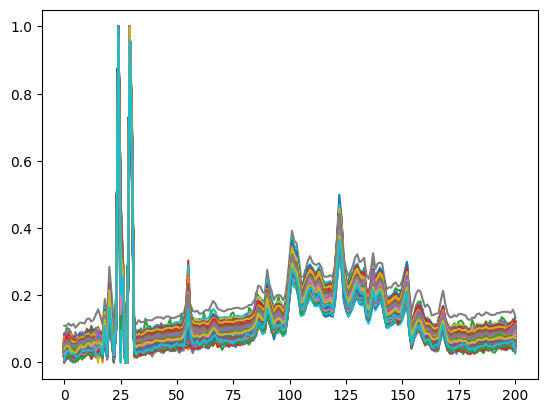

In [72]:


count = 0

name = 'ReS2'

data_path = './2DMaterials/'+name


data = pd.read_csv(data_path+'.csv',delimiter=';',header=None)
data = dff.transpose(data)
RS,Nums=data.shape

x, y =np.array(data.iloc[:,0]),  np.array(dff.transpose(data.iloc[:,1:]))

xx = np.linspace(100, 500, 201)
xx = xx.astype(int)
tmp=np.zeros_like(xx)

for i in range(Nums-1):
    tck = interpolate.splrep(x, y[i]) # 进行样条插值
    yy = interpolate.splev(xx, tck, der=0)
    yy = (yy - yy.min(axis=0))/(yy.max(axis=0) - yy.min(axis=0))
    tmp=np.vstack((tmp, yy))

tmp = np.array(tmp[1:,:])
plt.plot(dff.transpose(tmp))

np.savetxt('D:\Data-Processing\SpectraGenerator\DDPMvsGAN\plotReS2_gan.csv',dff.transpose(np.vstack((xx, tmp))),delimiter=';')


In [19]:


count = 0

name = 'WTe2'

data_path = './2DMaterials/'+name

all_files_path=[] # 获取所有文件的完整路径名
for root, dirs, files in os.walk(data_path,topdown=False):
    if len(files)>0:
        each_foder_files=[os.path.join(root,x) for x in files]
        all_files_path.extend(each_foder_files)

docnum = len(all_files_path) #Number of spectra

for file in all_files_path:
    data = np.loadtxt(file, encoding='utf-8')
    x = data[:,0] # 读取第一列数据
    y = data[:,1] # 读取第二列数据
    tck = interpolate.splrep(x, y) # 进行样条插值
    xx = np.linspace(50, 300, 126)
    xx = xx.astype(int)
    yy = interpolate.splev(xx, tck, der=0)
    np.savetxt('./AfterLI/'+name+'/'+name +str(count+1)+'.txt',np.transpose([xx,yy]))
    count = count + 1


print("Total number of spectra: ", count)

Total number of spectra:  27


Text(0, 0.5, 'Intensity')

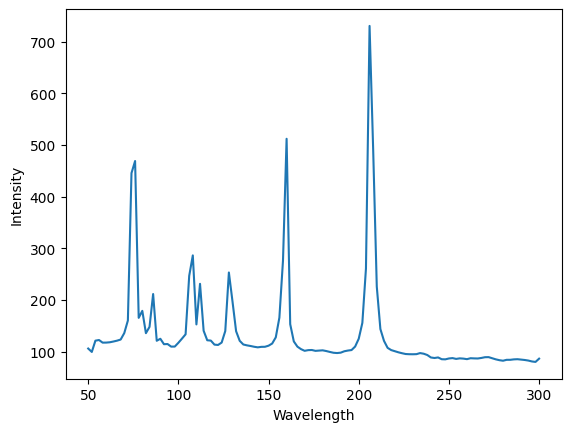

In [17]:
plt.plot(xx,yy)
plt.xlabel('Wavelength')
plt.ylabel('Intensity')

In [20]:
data = np.loadtxt('./AfterLI/ReS2/ReS21.txt')

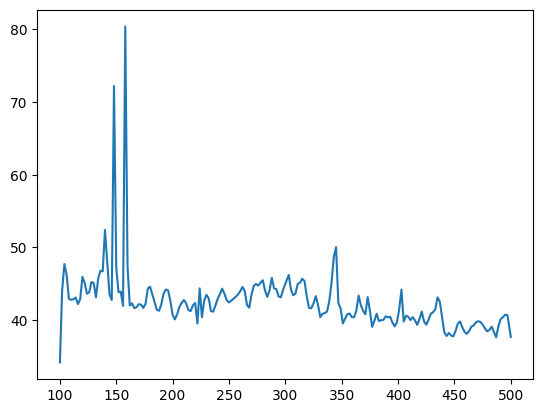

In [21]:
x=data[:,0]
y=data[:,1]
plt.plot(x,y)

In [2]:
count = 0

data_path = './AfterLI/'

all_files_path=[] # 获取所有文件的完整路径名
for root, dirs, files in os.walk(data_path,topdown=False):
    if len(files)>0:
        each_foder_files=[os.path.join(root,x) for x in files]
        all_files_path.extend(each_foder_files)

docnum = len(all_files_path) #Number of spectra

for file in all_files_path:
    data = np.loadtxt(file, encoding='utf-8')
    x = data[:,0] # 读取第一列数据
    y = data[:,1] # 读取第二列数据
    tck = interpolate.splrep(x, y) # 进行样条插值
    xx = np.linspace(min(x), max(x), 1000)
    yy = interpolate.splev(xx, tck, der=0)
    plt.plot(xx,yy,color='tab:orange')
    plt.xlabel('Wavelength')
    plt.ylabel('Intensity')
    plt.savefig('{}.png'.format(file), dpi = 300)
    plt.close()
    count = count + 1


print("Total number of spectra: ", count)

Total number of spectra:  574


In [21]:
from openpyxl import Workbook  # 引用openpyxl的Workbook

name='WTe2'
flist = glob.glob('./AfterLI/'+name+'/*.txt')  # 读取当前文件夹所有txt，并存入列表

wb = Workbook()  # 工作簿
ws = wb.active  # 打开要保存数据的sheet
i = 1  # 序数，用来将从txt提取的数据存储到excel的不同列

for filename in flist:  # 利用for循环逐个读取txt文件
    array = np.loadtxt(filename, dtype=np.str_, skiprows=0)  # 将当前读取的txt文件数据存储矩阵
    # delimiter默认为空格
    number_row = array.shape[0] # 获取数据矩阵行数

    for j in range(number_row):
        ws.cell(j + 1, i).value = float(array[j][1])  # 将需要用的第二列数据以字符串形式存储在excel中
    i += 1

wb.save('./AfterLI/'+name+'.xlsx')  # 保存excel文件并退出
print("Done.")

Done.


In [22]:
import pandas as pd
name='WTe2'
data_origin = pd.read_excel('./AfterLI/'+name+'.xlsx', header=None,index_col=None)
data_nor = (data_origin - data_origin.min(axis=0))/(data_origin.max(axis=0) - data_origin.min(axis=0))
data_nor.to_csv('./AfterLI/Norm'+ name +'.csv', sep=';',header=None)
print('done')


done


In [23]:
import pandas as pd
name='WTe2'
data_origin = pd.read_excel('./AfterLI/'+name+'.xlsx', header=None,index_col=None)
data_nor = data_origin
data_nor.to_csv('./AfterLI/Raw'+ name +'.csv', sep=';',header=None)
print('done')

done


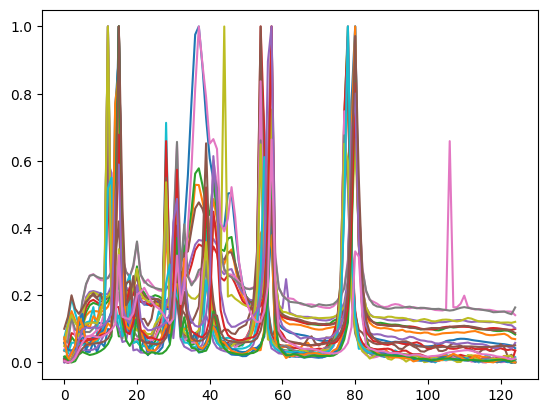

In [33]:

plt.plot(data_nor)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('./AfterLI/RawGraphene.csv',delimiter=';',header=None,index_col=0)
# data = data.iloc[:, 1:]
data

,1,2,3,4,5,6,7,8,9,10,...,200,201,202,203,204,205,206,207,208,209
0,,,,,,,,,,,,,,,,,,,,,
Raman shift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1200,1.509445,2.409490,2.910023,1.451543,2.933273,1.138798,0.506280,1.455178,0.904143,2.352202,...,0.280213,2.540179,1.543861,1.442007,1.159250,3.440000e-18,0.754513,1.047220,1.763667,1.794629
1202,1.607705,0.801344,2.428566,1.840880,2.666076,0.873935,1.125710,1.442802,0.557271,0.874359,...,0.709840,0.229443,1.015342,1.511450,1.023872,7.057466e-01,1.127988,0.660034,1.804330,1.063390
1204,1.246355,1.330996,2.533056,0.796516,2.845317,0.757421,1.691127,1.141220,0.449447,1.634997,...,1.009804,0.822355,1.013076,0.983236,0.889160,7.836727e-01,0.779390,0.555446,1.940454,1.330690
1206,1.102569,1.387936,2.821546,0.704771,2.761754,1.123132,1.267091,0.958229,0.854643,1.651895,...,0.714341,1.978752,1.282485,0.766836,0.693542,7.615191e-01,1.510251,1.157271,0.766711,0.680137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,1.343086,1.836303,0.306001,1.579172,2.313771,1.815627,0.748005,0.712652,1.069713,1.287341,...,0.845596,0.807712,1.647079,0.751915,1.376765,1.437421e+00,0.446126,0.735796,0.358434,0.455945
1744,0.551215,1.920407,0.754898,1.271803,1.995275,-0.031065,1.116174,0.679711,0.393211,1.735609,...,0.809789,1.354821,1.391051,1.902874,1.027915,1.295279e+00,1.285110,0.911603,0.612179,0.281876
1746,0.873154,1.648644,1.595770,1.509521,1.946799,1.299618,1.587324,0.563976,0.062339,1.997941,...,1.728728,1.558924,1.473016,1.737113,1.315007,7.368754e-01,0.932186,1.307538,1.294394,1.142098


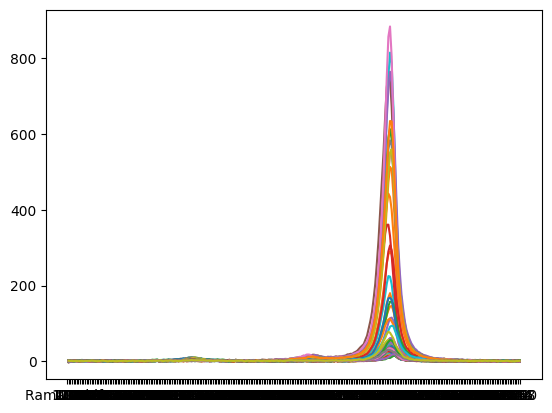

In [27]:
plt.plot(data)

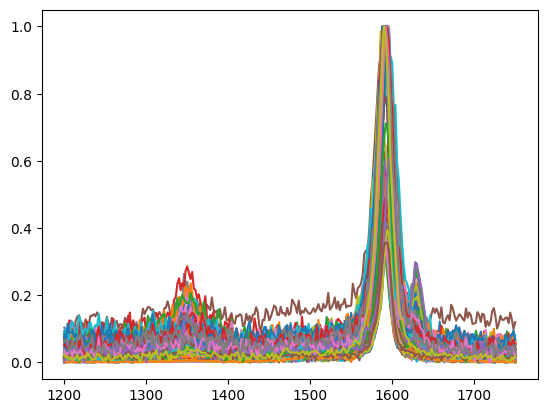

In [8]:
plt.plot(data)